In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/ml-100k"


ml-100k


epoch: 0, cost: 13.298371


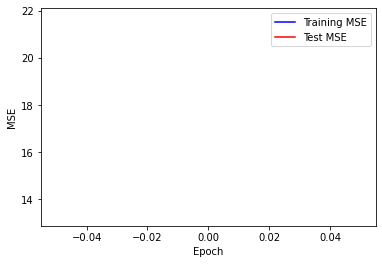

epoch: 100, cost: 0.635726


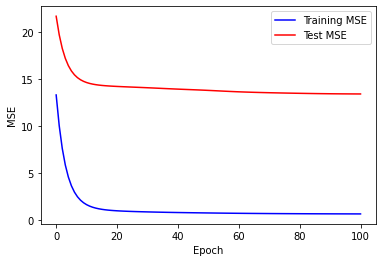

epoch: 200, cost: 0.608993


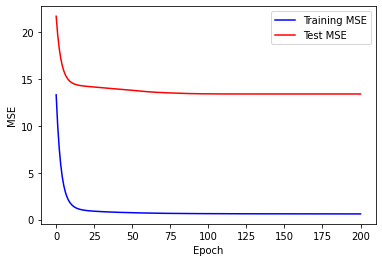

epoch: 300, cost: 0.605183


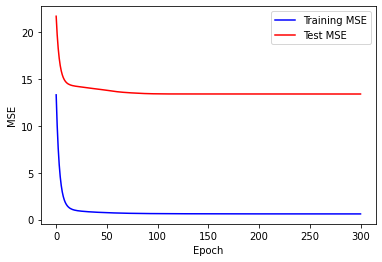

epoch: 400, cost: 0.604103


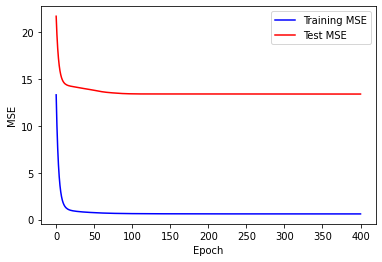

epoch: 500, cost: 0.603447


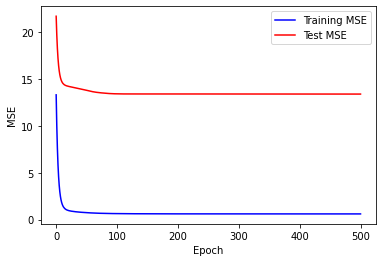

epoch: 600, cost: 0.603009


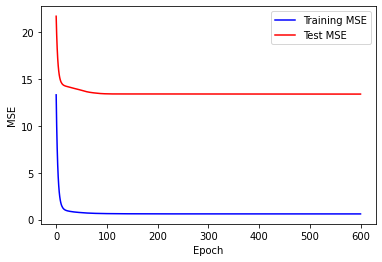

epoch: 700, cost: 0.602735


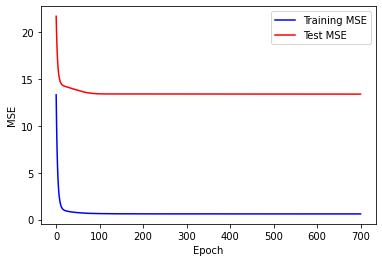

epoch: 800, cost: 0.602449


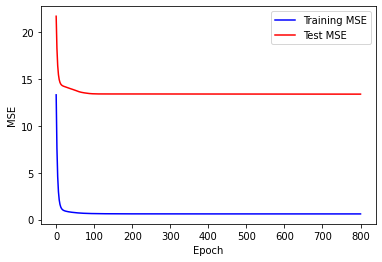

epoch: 900, cost: 0.602313


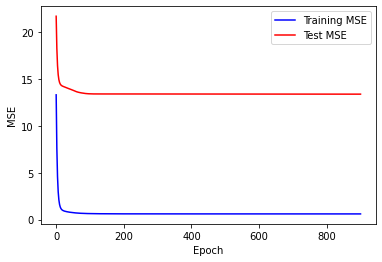

In [22]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

train = pd.read_csv("/content/gdrive/MyDrive/ml-100k/ml-100k/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/MyDrive/ml-100k/ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])


items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)
X = []
Y = []
Y_test = []

for epoch in range(1000):
 hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)

 with torch.no_grad():
  hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
  cost_test = F.mse_loss(hypo_test, ratings_test)
  Y_test.append(cost_test)

 if epoch % 100 == 0:
  print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

  plt.ylabel("MSE")
  plt.xlabel("Epoch")
  plt.plot(X,Y, c="blue", label="Training MSE")
  plt.plot(X,Y_test, c="red", label="Test MSE")
  plt.legend()
  plt.show()

 ...
